In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, svm

In [2]:
iris = datasets.load_iris()
df_Input = pd.DataFrame(iris.data)
df_Input.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df_Output = pd.DataFrame(iris.target)
df_Output.head()

,0
0,0
1,0
2,0
3,0
4,0


In [8]:
X = iris.data
y = iris.target

In [9]:
X = X[y!=0,:2]
print(len(X))
y = y[y!=0]
print(y)

100
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [10]:
n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

In [14]:
X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9* n_sample)]
X_test = X[:int(.9 * n_sample):]
y_test = y[:int(.9 * n_sample):]

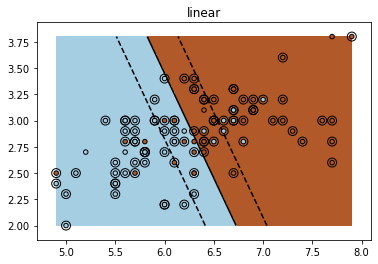

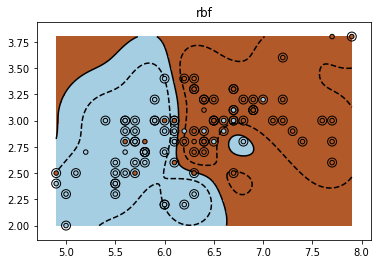

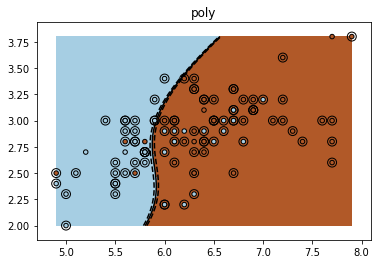

In [18]:
#fit the model
for kernel in ('linear','rbf','poly'):
    clf =svm.SVC(kernel = kernel, gamma=10)
    clf.fit(X_train, y_train)
    
    plt.figure()
    plt.clf()
    plt.scatter(X[:,0], X[:,1], c=y,zorder=10, cmap=plt.cm.Paired,
               edgecolor='k',s=20)
    #Circle out hte test data
    plt.scatter(X_test[:,0],X_test[:,1], s=80, facecolors='none',zorder=10, edgecolor='k')
    
    plt.axis('tight')
    x_min = X[:,0].min()
    x_max = X[:,0].max()
    y_min = X[:,1].min()
    y_max = X[:,1].max()
    
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z>0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k','k','k'],
               linestyles=['--','-','--'], levels=[-.5,0,.5])
    plt.title(kernel)
plt.show()